Importation of lbraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
jan_data = pd.read_parquet(r"C:\Users\Abdullahi Mujaheed\Downloads\yellow_tripdata_2023-01.parquet")
jan_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


Q1. Read the data for January. How many columns are there?
Ans: 19

In [3]:
feb_data = pd.read_parquet(r"C:\Users\Abdullahi Mujaheed\Downloads\yellow_tripdata_2023-02.parquet")
feb_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.4,3.50,0.5,0.0,0.0,1.0,9.40,2.5,0.00
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,-3.0,-1.00,-0.5,0.0,0.0,-1.0,-5.50,0.0,0.00
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,3.0,1.00,0.5,0.0,0.0,1.0,5.50,0.0,0.00
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.9,2.25,0.5,0.0,0.0,1.0,74.65,0.0,1.25
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.0,1.00,0.5,3.3,0.0,1.0,25.30,2.5,0.00


Q1. checking the row and columns of both datasets.

In [4]:
print(jan_data.shape, feb_data.shape)

(3066766, 19) (2913955, 19)


Stacking the datasets together

In [5]:
feb_data.columns = jan_data.columns

In [6]:
print(jan_data.columns, '\n', feb_data.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object') 
 Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')


In [7]:
revised_full_data = pd.concat([jan_data, feb_data], ignore_index = True)
print(revised_full_data.shape)

(5980721, 19)


calculating the trip duration

In [8]:
'''revised_full_data['duration'] = revised_full_data['tpep_dropoff_datetime'] - revised_full_data['tpep_pickup_datetime']
revised_full_data['duration'].head()'''

jan_data['duration'] = jan_data['tpep_dropoff_datetime'] - jan_data['tpep_pickup_datetime']
jan_data['duration'].head()

0   0 days 00:08:26
1   0 days 00:06:19
2   0 days 00:12:45
3   0 days 00:09:37
4   0 days 00:10:50
Name: duration, dtype: timedelta64[us]

Q2. It should contain the duration of a ride in minutes.

What's the standard deviation of the trips duration in January?

In [9]:
'''revised_full_data.duration = revised_full_data.duration.apply(lambda td: td.total_seconds() / 60)'''

jan_data.duration = jan_data.duration.apply(lambda td: td.total_seconds() / 60)

In [10]:
print(jan_data.duration)

'''print(revised_full_data.duration)'''

0           8.433333
1           6.316667
2          12.750000
3           9.616667
4          10.833333
             ...    
3066761    13.983333
3066762    19.450000
3066763    24.516667
3066764    13.000000
3066765    14.400000
Name: duration, Length: 3066766, dtype: float64


'print(revised_full_data.duration)'

In [11]:
jan_data['duration'] = jan_data['tpep_dropoff_datetime'] - jan_data['tpep_pickup_datetime']

In [12]:
jan_data.duration = jan_data.duration.apply(lambda td: td.total_seconds() / 60)
jan_data.duration.std()


np.float64(42.59435124195458)

ANS: the std of january trips is 42.5944

In [13]:
import matplotlib.pyplot as plt

In [14]:
jan_data.duration.isna().sum()

np.int64(0)

{'whiskers': [<matplotlib.lines.Line2D at 0x24c3a837b10>,
 'caps': [<matplotlib.lines.Line2D at 0x24c3a837d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x24c3a8379d0>],
 'medians': [<matplotlib.lines.Line2D at 0x24c3a874050>],
 'fliers': [<matplotlib.lines.Line2D at 0x24c3a874190>],
 'means': []}

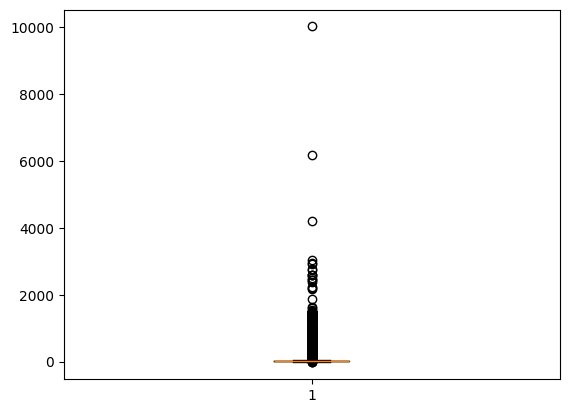

In [15]:
plt.boxplot(jan_data['duration'].dropna())

 Q3. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusiveQQ

In [16]:
'''# Remove outliers: keep only durations between 1 and 60 minutes (inclusive)
filtered_full_data = revised_full_data[(revised_full_data.duration >= 1) & (revised_full_data.duration <= 60)]

# Calculate the fraction of records left
fraction_left = len(filtered_full_data) / len(revised_full_data)
print(f"Fraction of records left: {fraction_left:.3f}")'''

# Remove outliers: keep only durations between 1 and 60 minutes (inclusive)
filtered_jan_data = jan_data[(jan_data.duration >= 1) & (jan_data.duration <= 60)]

# Calculate the fraction of records left
fraction_left = len(filtered_jan_data) / len(jan_data)
print(f"Fraction of records left: {fraction_left:.3f}")

Fraction of records left: 0.981


98% of the total data left dropping the outliers

In [17]:
# Select only pickup and dropoff location IDs, cast to string
loc_df = jan_data[['PULocationID', 'DOLocationID']].astype(str)

# Convert to list of dictionaries
loc_dicts = loc_df.to_dict(orient='records')

In [18]:
from sklearn.feature_extraction import DictVectorizer

In [19]:
vectorizer = DictVectorizer(sparse = True)
tf_log_dicts = vectorizer.fit_transform(loc_dicts)

In [20]:
tf_log_dicts.shape

(3066766, 518)

Q4. ANS: 521 columns present 

importing and training a linear regression model

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(tf_log_dicts, jan_data.duration)

LinearRegression()

In [24]:
y_pred =  lr.predict(tf_log_dicts)

In [29]:
from sklearn.metrics import root_mean_squared_error

In [31]:
rmse = root_mean_squared_error(jan_data['duration'], y_pred)

getting the rmse

In [32]:
print(f'the rmse of the trained data = {rmse}')

the rmse of the trained data = 41.99649697672271


fitting the model on the validation set, calculating the rmse on the validating set

In [35]:
# Prepare validation set: use February data, filter duration between 1 and 60 minutes
feb_data['duration'] = (feb_data['tpep_dropoff_datetime'] - feb_data['tpep_pickup_datetime']).dt.total_seconds() / 60
filtered_feb_data = feb_data[(feb_data['duration'] >= 1) & (feb_data['duration'] <= 60)]

# Prepare features for validation set
val_loc_df = filtered_feb_data[['PULocationID', 'DOLocationID']].astype(str)
val_loc_dicts = val_loc_df.to_dict(orient='records')
X_val = vectorizer.transform(val_loc_dicts)

# Predict and calculate RMSE
y_val = filtered_feb_data['duration'].values
y_val_pred = lr.predict(X_val)

val_rmse = root_mean_squared_error(y_val, y_val_pred)
print(f'Validation RMSE: {val_rmse:.2f}')

Validation RMSE: 7.95
